# Predicting House Prices using Decision Trees
### Author: Nihar Sawant
### Tools: Python, Pandas, Scikit-learn


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../input/home-data-for-ml-course/train.csv")

y = data.SalePrice
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
X = data[features]



In [72]:

model = DecisionTreeRegressor()
model.fit(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, preds)
print("Mean Absolute Error:", dt_mae)


Mean Absolute Error: 29268.93698630137


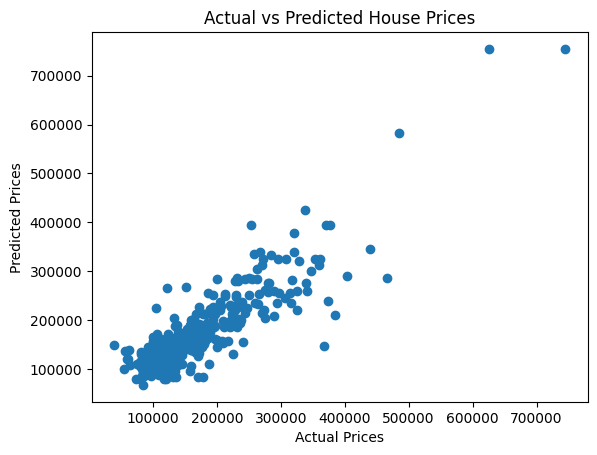

In [73]:
import matplotlib.pyplot as plt
plt.scatter(y_valid, preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [74]:
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", 
            "FullBath", "BedroomAbvGr", "TotRmsAbvGrd", 
            "GarageCars", "GarageArea", "Fireplaces"]

X = data[features]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_valid)
rf_mae = mean_absolute_error(y_valid, preds)
print("MAE after feature tuning:", mae)



MAE after feature tuning: 21393.104168949772


In [75]:
for depth in [5, 10, 20, 30, None]:
    model = RandomForestRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    rf_mae = mean_absolute_error(y_valid, preds)
    depth_label = depth if depth is not None else "None"
    print(f"max_depth={depth_label} -> MAE={rf_mae:.0f}")



max_depth=5 -> MAE=24099
max_depth=10 -> MAE=21301
max_depth=20 -> MAE=21477
max_depth=30 -> MAE=21393
max_depth=None -> MAE=21393


max_depth=5 -> MAE=24099
max_depth=10 -> MAE=21301
max_depth=20 -> MAE=21477
max_depth=30 -> MAE=21393
max_depth=None -> MAE=21393


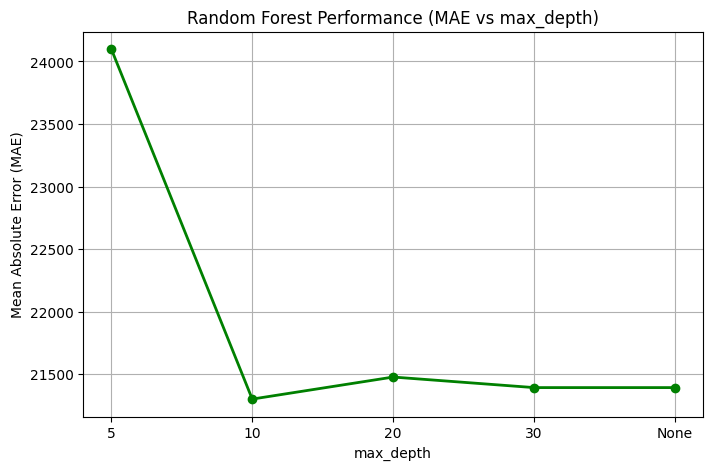

In [76]:
depths = [5, 10, 20, 30, None]
mae_values = []
depth_labels = []

for depth in depths:
    model = RandomForestRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, preds)
    
    mae_values.append(mae)
    depth_labels.append(str(depth))
    print(f"max_depth={depth} -> MAE={mae:.0f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(depth_labels, mae_values, marker='o', linewidth=2, color='green')
plt.title("Random Forest Performance (MAE vs max_depth)")
plt.xlabel("max_depth")
plt.ylabel("Mean Absolute Error (MAE)")
plt.grid(True)
plt.show()

### Insights
- Random Forest performs better than Decision Tree at all depths.
- The error decreases sharply until around max_depth=20–30, then stabilizes.
- Best tradeoff between accuracy and model complexity: max_depth ≈ 25.
